<a href="https://colab.research.google.com/github/Mathildeholst/Mathilde/blob/main/Data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bestanden af elbiler.xlsx to Bestanden af elbiler.xlsx


In [ ]:
import pandas as pd

# Read the file
df_raw = pd.read_excel("Bestanden af elbiler.xlsx", header=None)

# Take year og how many vehichles
år = df_raw.iloc[2, 3:].values
antal = df_raw.iloc[3, 3:].values

# Making a DataFrame
df = pd.DataFrame({
    "År": år,
    "Antal": antal
}).astype({"År": int, "Antal": int})

# Use year as integer index (no datetime)
df.set_index("År", inplace=True)

# Show the result
print(df)

      Antal
År         
2018    372
2019    439
2020    794
2021   1681
2022   3530
2023   6045
2024  10527
2025  17453


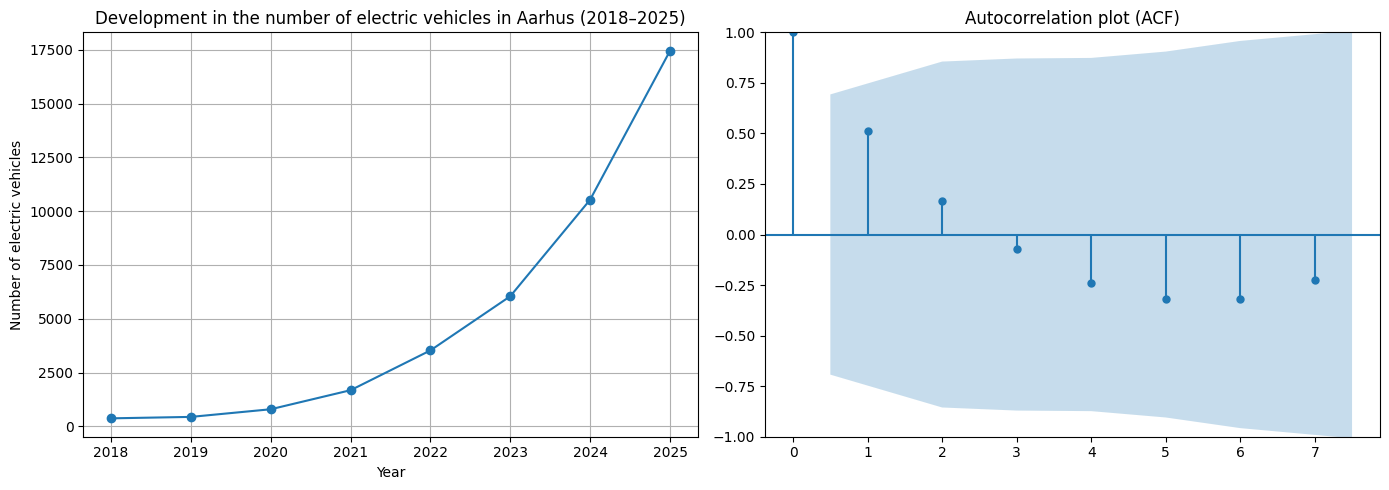

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# Convert to datetime
df.index = pd.to_datetime(df.index, format='%Y')

# Plot time series and ACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Time series plot
axes[0].plot(df.index, df["Antal"], marker='o')
axes[0].set_title("Development in the number of electric vehicles in Aarhus (2018–2025)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of electric vehicles")
axes[0].grid(True)

# ACF plot
plot_acf(df["Antal"], ax=axes[1], lags=len(df)-1)
axes[1].set_title("Autocorrelation plot (ACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF-test på original serie
resultat = adfuller(df["Antal"])

print("ADF Test Statistic:", resultat[0])
print("p-værdi:", resultat[1])
print("Antal lags brugt:", resultat[2])
print("Antal observationer:", resultat[3])
print("Kritiske værdier:")
for key, value in resultat[4].items():
    print(f"   {key}: {value}")

ADF Test Statistic: 17.408998645900244
p-værdi: 1.0
Antal lags brugt: 0
Antal observationer: 7
Kritiske værdier:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733


Dataen er ikke-stationær - kommenter både på plottet, acf og adf test.

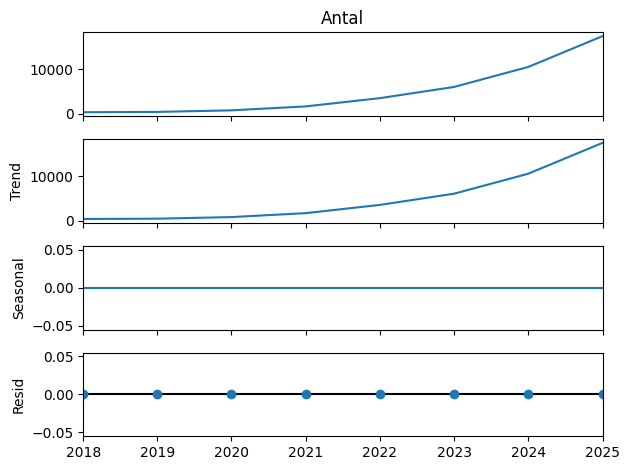

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Note: df.index must be in datetime format, and df["Antal"] should be a time series
# df.index has already been set to datetime

# Perform decomposition (use "additive" for roughly linear growth, "multiplicative" for percentage-based trends)
result = seasonal_decompose(df["Antal"], model="additive", period=1)

# Plot the results
result.plot()
plt.tight_layout()
plt.show()

Ingen seasonality - dette kan udelukkes her

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/li

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.968, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.355, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=107.497, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=247.452, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.629 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(da

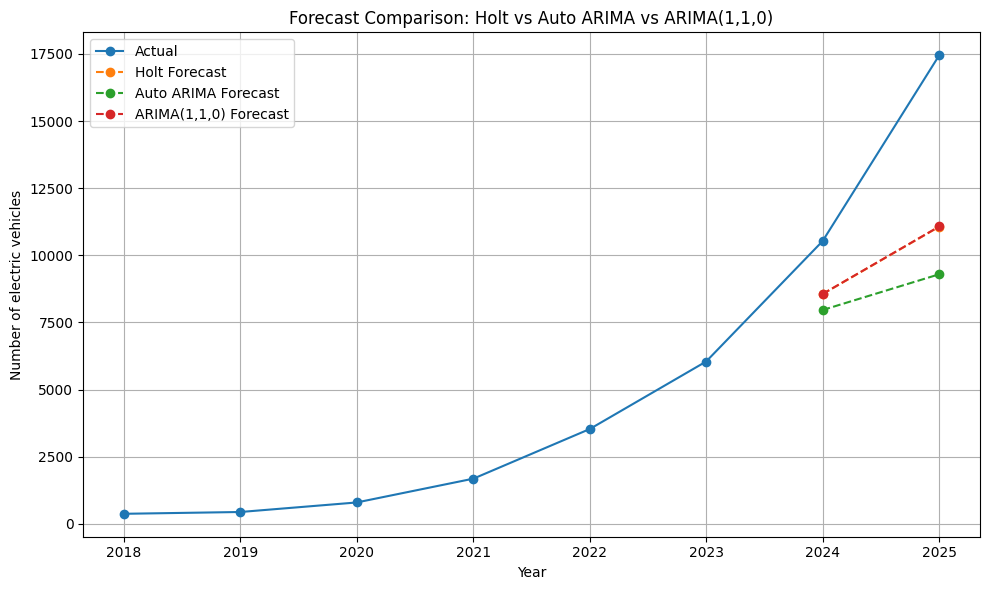

Forecast vs Actual:
            Actual  Holt Forecast  Auto ARIMA Forecast  ARIMA(1,1,0) Forecast
Year                                                                         
2024-01-01   10527    8554.692479          7962.064901            8559.833248
2025-01-01   17453   11067.774080          9294.814988           11074.499755

Model Evaluation:
          Model     RMSE      MAE  MAPE (%)
0          Holt  4725.52  4178.77     27.66
1    Auto ARIMA  6047.10  5361.56     35.55
2  ARIMA(1,1,0)  4719.91  4172.83     27.62

Holt’s parameters:
Alpha (level): 0.995
Beta (trend): 0.995

Auto ARIMA selected model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -50.748
Date:                Tue, 15 Apr 2025   AIC                            107.497
Time:                        11:12:10   BIC                         

In [ ]:
# Install necessary packages
!pip install numpy==1.24.4 --force-reinstall
!pip install pmdarima

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare data
df_raw = pd.read_excel("Bestanden af elbiler.xlsx", header=None)
years = df_raw.iloc[2, 3:].values
values = df_raw.iloc[3, 3:].values

df = pd.DataFrame({"Year": years, "EVs": values}).astype({"Year": int, "EVs": int})
df.set_index("Year", inplace=True)
df.index = pd.to_datetime(df.index, format="%Y")

# Split into training (2018–2023) and test (2024–2025)
train = df.loc[:'2023']
test = df.loc['2024':]

# Holt’s model
holt_model = Holt(train["EVs"]).fit()
holt_forecast = holt_model.forecast(len(test))
holt_forecast.index = test.index

# Auto ARIMA
auto_model = auto_arima(train["EVs"], seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
auto_forecast = auto_model.predict(n_periods=len(test))
auto_forecast = pd.Series(auto_forecast, index=test.index)

# Manual ARIMA(1,1,0)
manual_arima_model = ARIMA(train["EVs"], order=(1, 1, 0)).fit()
manual_arima_forecast = manual_arima_model.forecast(len(test))
manual_arima_forecast.index = test.index

# Combine actual vs forecasted
results = pd.DataFrame({
    "Actual": test["EVs"],
    "Holt Forecast": holt_forecast,
    "Auto ARIMA Forecast": auto_forecast,
    "ARIMA(1,1,0) Forecast": manual_arima_forecast
})

# Evaluation function
def eval_forecast(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return round(rmse, 2), round(mae, 2), round(mape, 2)

# Calculate performance metrics
holt_rmse, holt_mae, holt_mape = eval_forecast(results["Actual"], results["Holt Forecast"])
auto_rmse, auto_mae, auto_mape = eval_forecast(results["Actual"], results["Auto ARIMA Forecast"])
manual_rmse, manual_mae, manual_mape = eval_forecast(results["Actual"], results["ARIMA(1,1,0) Forecast"])

metrics = pd.DataFrame({
    "Model": ["Holt", "Auto ARIMA", "ARIMA(1,1,0)"],
    "RMSE": [holt_rmse, auto_rmse, manual_rmse],
    "MAE": [holt_mae, auto_mae, manual_mae],
    "MAPE (%)": [holt_mape, auto_mape, manual_mape]
})

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["EVs"], label="Actual", marker='o')
plt.plot(results.index, results["Holt Forecast"], label="Holt Forecast", marker='o', linestyle="--")
plt.plot(results.index, results["Auto ARIMA Forecast"], label="Auto ARIMA Forecast", marker='o', linestyle="--")
plt.plot(results.index, results["ARIMA(1,1,0) Forecast"], label="ARIMA(1,1,0) Forecast", marker='o', linestyle="--")
plt.title("Forecast Comparison: Holt vs Auto ARIMA vs ARIMA(1,1,0)")
plt.xlabel("Year")
plt.ylabel("Number of electric vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast results
print("Forecast vs Actual:")
print(results)

# Print evaluation metrics
print("\nModel Evaluation:")
print(metrics)

# Show model details
print("\nHolt’s parameters:")
print(f"Alpha (level): {round(holt_model.model.params['smoothing_level'], 3)}")
print(f"Beta (trend): {round(holt_model.model.params['smoothing_trend'], 3)}")

print("\nAuto ARIMA selected model:")
print(auto_model.summary())

Bedste model er ARIMA 1.1.0 er den bedste

Vælger at forecaste med ARIMA 1.1.0
i perioden 5 år frem

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


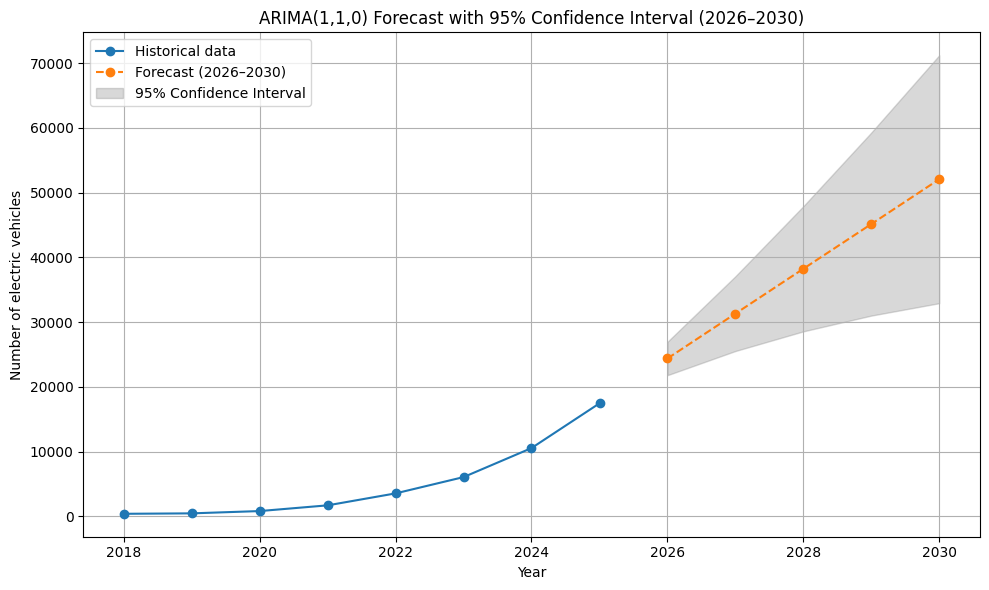

Forecast for 2026–2030 with confidence intervals:
            Forecast  CI Lower (95%)  CI Upper (95%)
Year                                                
2026-01-01     24379           21795           26963
2027-01-01     31305           25528           37082
2028-01-01     38231           28564           47898
2029-01-01     45157           31006           59307
2030-01-01     52082           32922           71242


In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare data (update file name to match your current Excel file)
df_raw = pd.read_excel("Bestanden af elbiler.xlsx", header=None)
years = df_raw.iloc[2, 3:].values
values = df_raw.iloc[3, 3:].values

df = pd.DataFrame({"Year": years, "EVs": values}).astype({"Year": int, "EVs": int})
df.set_index("Year", inplace=True)
df.index = pd.to_datetime(df.index, format="%Y")

# Train ARIMA(1,1,0) on the full dataset (2018–2025)
model = ARIMA(df["EVs"], order=(1, 1, 0)).fit()

# Forecast for the next 5 years with confidence intervals
forecast_periods = 5
forecast_result = model.get_forecast(steps=forecast_periods)
forecast_mean = forecast_result.predicted_mean
ci = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Create datetime index for forecasted years (2026–2030)
forecast_years = pd.date_range(start="2026", periods=forecast_periods, freq='YS')
forecast_mean.index = forecast_years
ci.index = forecast_years

# Create forecast DataFrame with confidence intervals
forecast_df = pd.DataFrame({
    "Forecast": forecast_mean.round().astype(int),
    "CI Lower (95%)": ci.iloc[:, 0].round().astype(int),
    "CI Upper (95%)": ci.iloc[:, 1].round().astype(int)
})
forecast_df.index.name = "Year"

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["EVs"], label="Historical data", marker='o')
plt.plot(forecast_mean.index, forecast_mean, label="Forecast (2026–2030)", marker='o', linestyle="--")
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3, label="95% Confidence Interval")
plt.title("ARIMA(1,1,0) Forecast with 95% Confidence Interval (2026–2030)")
plt.xlabel("Year")
plt.ylabel("Number of electric vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show forecast table
print("Forecast for 2026–2030 with confidence intervals:")
print(forecast_df)

p = 1	Autoregressive (AR)	Modellen bruger den forrige observation til at forudsige den næste

d = 1	Integrated (I)	Modellen differencierer én gang for at fjerne en trend i dataen

q = 0	Moving Average (MA)	Der bruges ingen glidende gennemsnit af fejlled

Husk at argumentere hvorfor vi valgte at prøve en arima 1.1.0

Saving ladestander (3).xlsx to ladestander (3).xlsx
Number of charging points per district:
district_n
Aarhus C          326
Aarhus N          211
Viby J             97
Vejlby/Risskov     41
Tilst              31
Aarhus V           27
Lystrup            25
Højbjerg           24
Brabrand           21
Aabyhøj            18
Egå                14
Beder               8
Hjortshøj           8
Malling             6
Tranbjerg           6
Hasselager          5
Solbjerg            4
Aarhus Ø            4
Harlev              2
Mårslet             2
Skødstrup           2
Name: punkter, dtype: int64


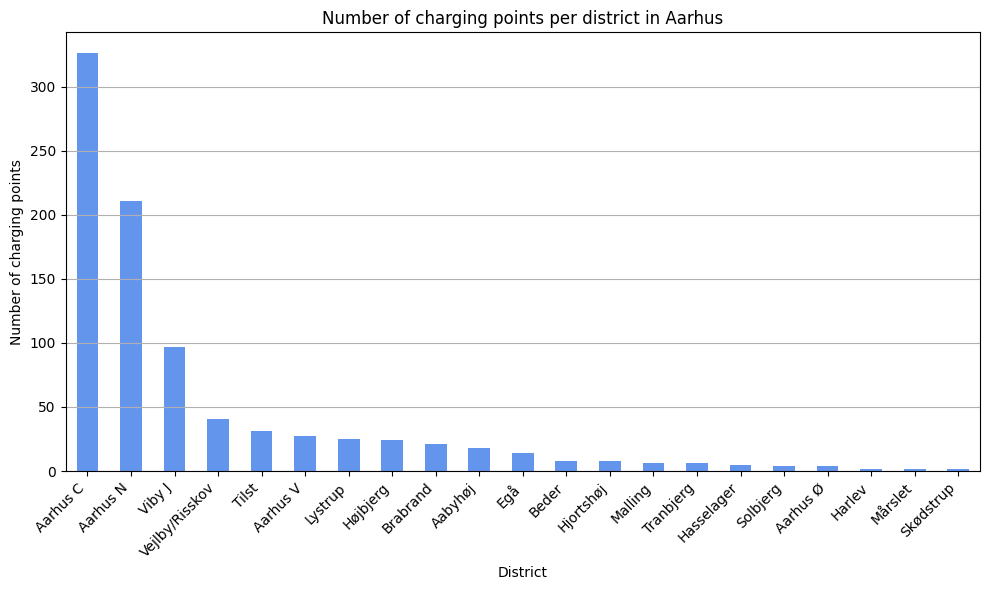

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load Excel file
import pandas as pd
df = pd.read_excel("ladestander (3).xlsx")

# Clean district names (remove \n, extra spaces, and hidden errors)
df["district_n"] = df["district_n"].str.strip().str.replace(r"\s+", " ", regex=True)

# Group by district and sum charging points
charging_points_by_district = df.groupby("district_n")["punkter"].sum().sort_values(ascending=False)

# Print table
print("Number of charging points per district:")
print(charging_points_by_district)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
charging_points_by_district.plot(kind="bar", color="cornflowerblue")
plt.title("Number of charging points per district in Aarhus")
plt.ylabel("Number of charging points")
plt.xlabel("District")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Saving ladestander (3).xlsx to ladestander (3) (4).xlsx


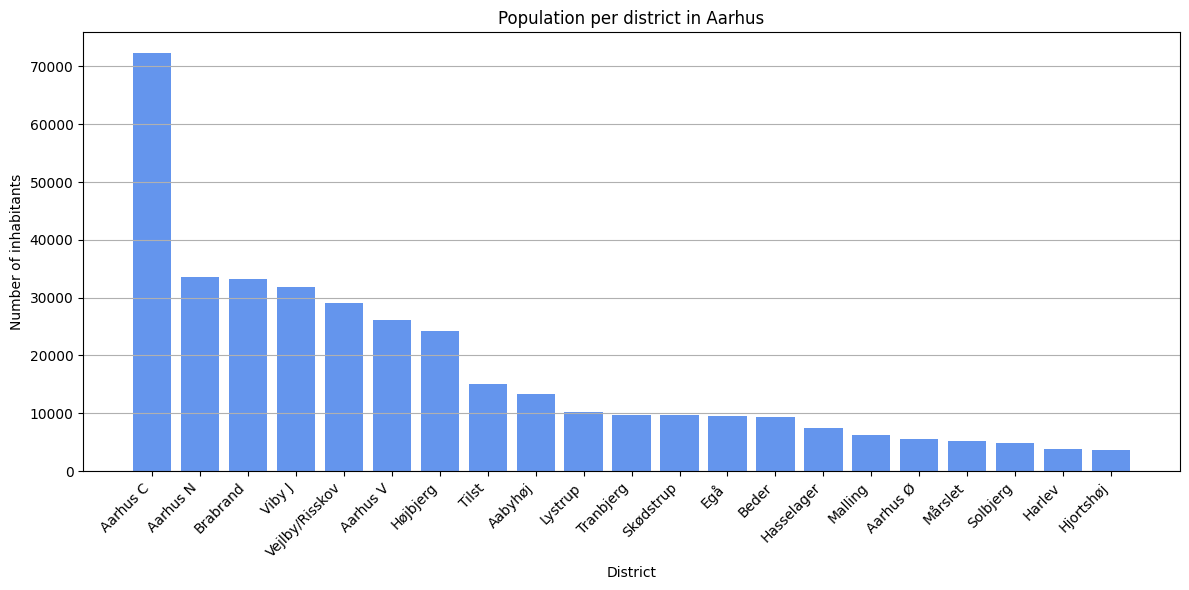

In [ ]:
# Upload Excel file (remember to select it in the pop-up)
from google.colab import files
uploaded = files.upload()

# Read Excel data
import pandas as pd
df = pd.read_excel("ladestander (3).xlsx")  # ← Update filename if needed

# Clean district names
df["district_n"] = df["district_n"].str.strip().str.replace(r"\s+", " ", regex=True)

# Sort by population
df_sorted = df.sort_values("Befolkningstal", ascending=False)

# Plot population per district with value labels
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(df_sorted["district_n"], df_sorted["Befolkningstal"], color="cornflowerblue")  # ← This was missing!
plt.title("Population per district in Aarhus")
plt.xlabel("District")
plt.ylabel("Number of inhabitants")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Saving ladestander (3).xlsx to ladestander (3) (5).xlsx


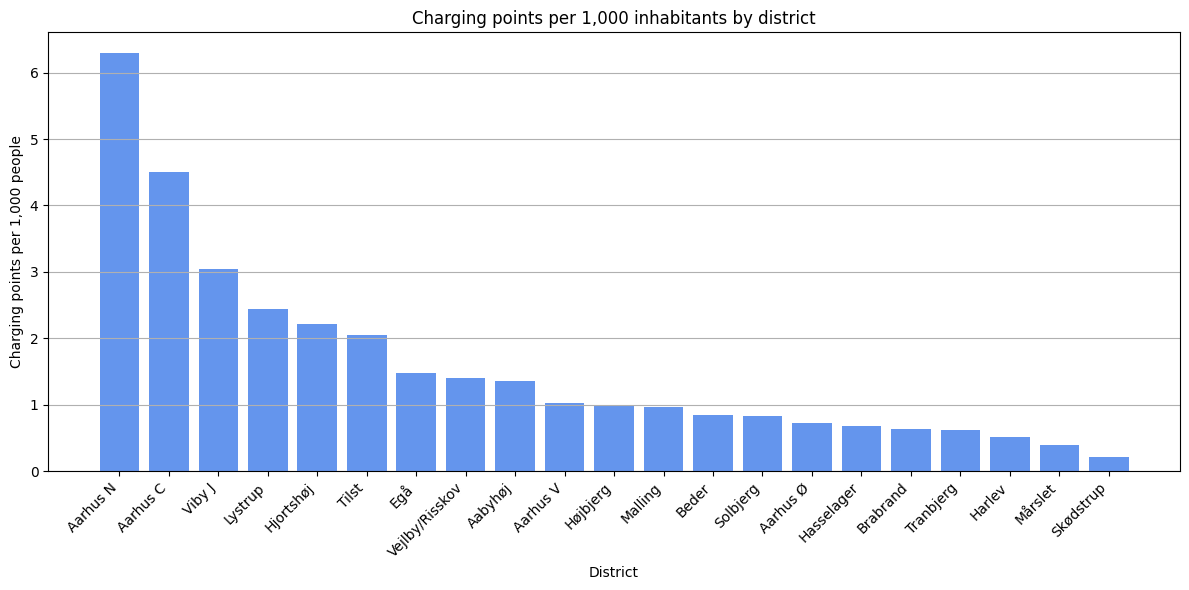

Table: Charging points per 1,000 inhabitants (cleaned and grouped):

        district_n  punkter  Befolkningstal  charging_points_per_1000
2         Aarhus N      211           33536                      6.29
1         Aarhus C      326           72291                      4.51
20          Viby J       97           31850                      3.05
12         Lystrup       25           10259                      2.44
10       Hjortshøj        8            3608                      2.22
17           Tilst       31           15145                      2.05
7              Egå       14            9450                      1.48
19  Vejlby/Risskov       41           29162                      1.41
0          Aabyhøj       18           13285                      1.35
3         Aarhus V       27           26167                      1.03
11        Højbjerg       24           24172                      0.99
13         Malling        6            6194                      0.97
5            Beder   

In [ ]:
# Upload the file in Colab
from google.colab import files
uploaded = files.upload()

# Load data
import pandas as pd

df = pd.read_excel("ladestander (3).xlsx")  # Make sure the filename matches your upload

# Clean district names
df["district_n"] = df["district_n"].str.strip().str.replace(r"\s+", " ", regex=True)

# Group correctly: sum charging points and select one population value per district
df_grouped = df.groupby("district_n", as_index=False).agg({
    "punkter": "sum",
    "Befolkningstal": "first"  # If repeated, take the first occurrence
})

# Calculate ratio
df_grouped["charging_points_per_1000"] = (df_grouped["punkter"] / df_grouped["Befolkningstal"]) * 1000

# Sort by ratio
df_sorted = df_grouped.sort_values("charging_points_per_1000", ascending=False)

# Plot the ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_sorted["district_n"], df_sorted["charging_points_per_1000"], color="cornflowerblue")
plt.title("Charging points per 1,000 inhabitants by district")
plt.xlabel("District")
plt.ylabel("Charging points per 1,000 people")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Display the final table
print("Table: Charging points per 1,000 inhabitants (cleaned and grouped):\n")
print(df_sorted[["district_n", "punkter", "Befolkningstal", "charging_points_per_1000"]].round(2))

  Scenario (EV:Charger)  Required Charging Points
0                  1:20                      2604
1                  1:25                      2083
2                  1:30                      1736


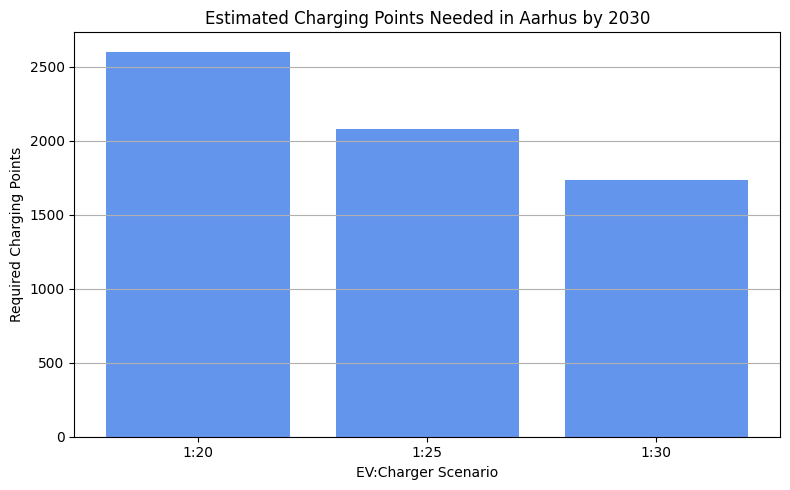

In [5]:
# Number of electric vehicles in Aarhus in 2030 (from forecast)
ev_2030 = 52082

# Scenarios (EVs per charging point)
scenarios = [20, 25, 30]

# Calculate required charging points for each scenario
required_points = {
    f"1:{s}": ev_2030 // s for s in scenarios
}

# Create DataFrame
import pandas as pd
required_df = pd.DataFrame(list(required_points.items()), columns=["Scenario (EV:Charger)", "Required Charging Points"])
print(required_df)

import matplotlib.pyplot as plt

# Bar chart of required charging points
plt.figure(figsize=(8, 5))
plt.bar(required_df["Scenario (EV:Charger)"], required_df["Required Charging Points"], color="cornflowerblue")

plt.title("Estimated Charging Points Needed in Aarhus by 2030")
plt.xlabel("EV:Charger Scenario")
plt.ylabel("Required Charging Points")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
